In [212]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import json

In [213]:
df = pd.read_csv("../data/raw/DiseaseAndSymptoms.csv")

In [214]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill NaN with 'none'

In [215]:
df.fillna('none', inplace=True)

In [216]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
3,Fungal infection,itching,skin_rash,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none


In [217]:
df.shape

(4920, 18)

Drop Dubplicates

In [218]:
df.drop_duplicates(inplace=True)

Check imBalance Data

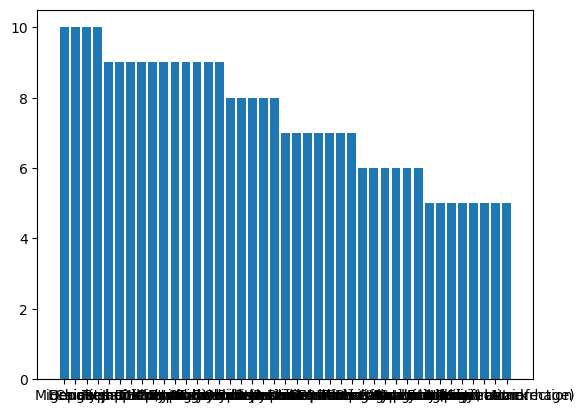

In [219]:
disease_counts = df['Disease'].value_counts()
x = disease_counts.index
y = disease_counts.values
plt.bar(x=x, height= y)
plt.show()

In [220]:
# df.to_csv("../data/processed/Cleaned_Top15Diseases.csv", index=False)

### Preprocessing


encode data

In [221]:
disease_col = 'Disease'
symptom_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3',
                'Symptom_4', 'Symptom_5', 'Symptom_6',
                'Symptom_7', 'Symptom_8', 'Symptom_9',
                'Symptom_10', 'Symptom_11', 'Symptom_12',
                'Symptom_13', 'Symptom_14', 'Symptom_15',
                'Symptom_16', 'Symptom_17']

In [222]:


# List of all symptom columns (Symptom_1 to Symptom_17)
symptom_columns = [f'Symptom_{i}' for i in range(1, 18)]
# Process each row to collect unique symptoms
combined_symptoms = []
for idx, row in df.iterrows():
    symptoms = set()
    for col in symptom_columns:
        val = row[col]
        if val is not None:
            val_stripped = val.strip()
            if val_stripped.lower() != 'none' and val_stripped != '':
                symptoms.add(val_stripped)
    # Sort symptoms to ensure consistent ordering for the same combination
    combined = ','.join(sorted(symptoms)) if symptoms else 'none'
    combined_symptoms.append(combined)

df['combined_symptoms'] = combined_symptoms

# Label encode the combined symptoms
le = LabelEncoder()
df['symptom_label'] = le.fit_transform(df['combined_symptoms'])

# Final DataFrame with Disease and encoded label
final_df = df[['symptom_label', 'Disease']]

print("Label Mapping:")
for i, combo in enumerate(le.classes_):
    print(f"{i}: {combo}")

print("\nEncoded DataFrame:")
print(final_df)

Label Mapping:
0: abdominal_pain,acute_liver_failure,coma,dark_urine,fatigue,high_fever,joint_pain,loss_of_appetite,nausea,stomach_bleeding,vomiting,yellowing_of_eyes
1: abdominal_pain,acute_liver_failure,coma,dark_urine,fatigue,high_fever,joint_pain,loss_of_appetite,nausea,stomach_bleeding,vomiting,yellowing_of_eyes,yellowish_skin
2: abdominal_pain,acute_liver_failure,coma,dark_urine,fatigue,high_fever,joint_pain,loss_of_appetite,nausea,stomach_bleeding,yellowing_of_eyes,yellowish_skin
3: abdominal_pain,acute_liver_failure,coma,dark_urine,fatigue,high_fever,joint_pain,loss_of_appetite,stomach_bleeding,vomiting,yellowing_of_eyes,yellowish_skin
4: abdominal_pain,acute_liver_failure,coma,dark_urine,fatigue,high_fever,loss_of_appetite,nausea,stomach_bleeding,vomiting,yellowing_of_eyes,yellowish_skin
5: abdominal_pain,acute_liver_failure,coma,dark_urine,fatigue,joint_pain,loss_of_appetite,nausea,stomach_bleeding,vomiting,yellowing_of_eyes,yellowish_skin
6: abdominal_pain,acute_liver_failur

In [223]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,combined_symptoms,symptom_label
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,nodal_skin_eruptio...",241
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,nodal_skin_eruptions,skin_...",243
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,nodal_skin_eruptions",240
3,Fungal infection,itching,skin_rash,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,skin_rash",242
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"itching,nodal_skin_eruptions,skin_rash",292


In [224]:

# for col in symptom_cols:
#     df[col] = df[col].map(symptom_mapping)

In [225]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,combined_symptoms,symptom_label
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,nodal_skin_eruptio...",241
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,nodal_skin_eruptions,skin_...",243
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,nodal_skin_eruptions",240
3,Fungal infection,itching,skin_rash,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,skin_rash",242
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"itching,nodal_skin_eruptions,skin_rash",292


In [226]:
with open('../data/processed/symptom_mapping.json', 'w') as f:
    json.dump(symptom_to_code, f, indent=4)

In [227]:
# Flatten all symptoms into a single list
all_disease = df['Disease'].dropna().tolist()

# Fit LabelEncoder
le = LabelEncoder()
le.fit(all_disease)  # Assigns a unique number to each symptom

# Save symptom-to-encoding mapping
disease_to_code = {symptom: code for code, symptom in enumerate(le.classes_)}
print(disease_to_code)

{np.str_('(vertigo) Paroymsal  Positional Vertigo'): 0, np.str_('AIDS'): 1, np.str_('Acne'): 2, np.str_('Alcoholic hepatitis'): 3, np.str_('Allergy'): 4, np.str_('Arthritis'): 5, np.str_('Bronchial Asthma'): 6, np.str_('Cervical spondylosis'): 7, np.str_('Chicken pox'): 8, np.str_('Chronic cholestasis'): 9, np.str_('Common Cold'): 10, np.str_('Dengue'): 11, np.str_('Diabetes '): 12, np.str_('Dimorphic hemmorhoids(piles)'): 13, np.str_('Drug Reaction'): 14, np.str_('Fungal infection'): 15, np.str_('GERD'): 16, np.str_('Gastroenteritis'): 17, np.str_('Heart attack'): 18, np.str_('Hepatitis B'): 19, np.str_('Hepatitis C'): 20, np.str_('Hepatitis D'): 21, np.str_('Hepatitis E'): 22, np.str_('Hypertension '): 23, np.str_('Hyperthyroidism'): 24, np.str_('Hypoglycemia'): 25, np.str_('Hypothyroidism'): 26, np.str_('Impetigo'): 27, np.str_('Jaundice'): 28, np.str_('Malaria'): 29, np.str_('Migraine'): 30, np.str_('Osteoarthristis'): 31, np.str_('Paralysis (brain hemorrhage)'): 32, np.str_('Pepti

In [228]:
print(all_symptoms)

['itching', 'skin_rash', 'itching', 'itching', 'itching', 'continuous_sneezing', 'shivering', 'continuous_sneezing', 'continuous_sneezing', 'continuous_sneezing', 'stomach_pain', 'stomach_pain', 'stomach_pain', 'stomach_pain', 'stomach_pain', 'stomach_pain', 'acidity', 'itching', 'vomiting', 'itching', 'itching', 'itching', 'itching', 'itching', 'itching', 'itching', 'itching', 'itching', 'itching', 'itching', 'skin_rash', 'vomiting', 'vomiting', 'indigestion', 'vomiting', 'vomiting', 'vomiting', 'vomiting', 'muscle_wasting', 'patches_in_throat', 'muscle_wasting', 'muscle_wasting', 'muscle_wasting', 'fatigue', 'weight_loss', 'fatigue', 'fatigue', 'fatigue', 'fatigue', 'fatigue', 'fatigue', 'fatigue', 'vomiting', 'sunken_eyes', 'vomiting', 'vomiting', 'vomiting', 'fatigue', 'cough', 'fatigue', 'fatigue', 'fatigue', 'fatigue', 'fatigue', 'headache', 'chest_pain', 'headache', 'headache', 'headache', 'headache', 'acidity', 'indigestion', 'acidity', 'acidity', 'acidity', 'acidity', 'acidity

In [229]:
with open('../data/processed/disease_mapping.json', 'w') as f:
    json.dump(disease_to_code, f, indent=4)

In [230]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,combined_symptoms,symptom_label
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,nodal_skin_eruptio...",241
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,nodal_skin_eruptions,skin_...",243
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,nodal_skin_eruptions",240
3,Fungal infection,itching,skin_rash,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"dischromic _patches,itching,skin_rash",242
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none,"itching,nodal_skin_eruptions,skin_rash",292


In [231]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [232]:
disease_col = 'Disease' #make sure this is the disease column name.
X = df.drop(disease_col, axis=1)
y = df[disease_col]

In [233]:
smote = SMOTE(sampling_strategy=0.45, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


ValueError: could not convert string to float: 'itching'

In [ ]:
print("Resampled class distribution:", Counter(y_resampled))


Get unique symptom